In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('dt_analysis - cv.csv')
df.head()

,tree,dataset,language,splitting_criterion,rows,columns,k-fold,accuracy,mcc,generation_time
0,d1,heart failure prediction,r,gini,299,13,20,81.17,0.560,0.623
1,d2,heart failure prediction,r,info gain,299,13,20,82.05,0.584,0.633
2,d3,heart failure prediction,r,gain ratio,299,13,20,81.94,0.579,0.076
3,d4,heart failure prediction,python,gini,299,13,20,78.68,0.163,0.086
4,d5,heart failure prediction,python,info gain,299,13,20,76.63,0.111,0.088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tree                 42 non-null     object 
 1   dataset              42 non-null     object 
 2   language             42 non-null     object 
 3   splitting_criterion  42 non-null     object 
 4   rows                 42 non-null     int64  
 5   columns              42 non-null     int64  
 6   k-fold               42 non-null     int64  
 7   accuracy             42 non-null     float64
 8   mcc                  42 non-null     float64
 9   generation_time      42 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 3.4+ KB


<AxesSubplot:xlabel='language'>

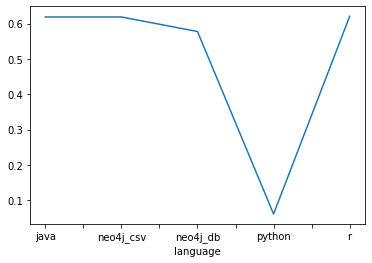

In [4]:
acc_df = df.groupby(['language']).mean()['mcc']
acc_df.plot.line()

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='accuracy'>

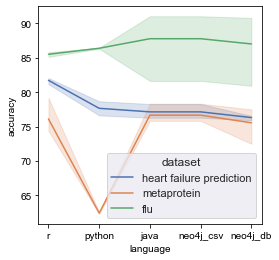

In [5]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('language','accuracy',  data =df, hue='dataset', ax=ax)

c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='splitting_criterion', ylabel='accuracy'>

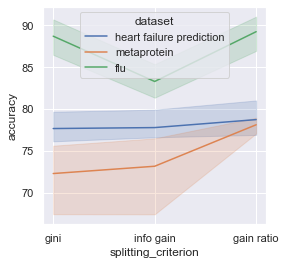

In [6]:
fig_dims = (4, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=1)
sns.lineplot('splitting_criterion','accuracy',  data =df, hue='dataset', ax=ax)


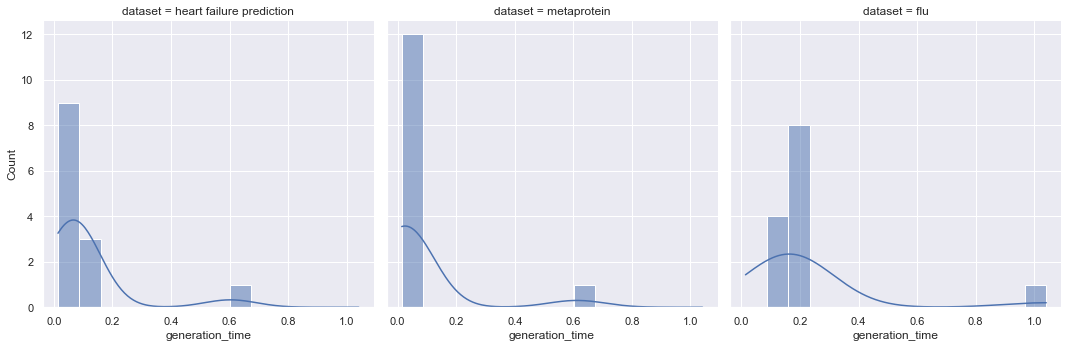

In [7]:
fig_dims = (8, 6)
sns.displot(data=df, x="generation_time",col= "dataset", kde=True)

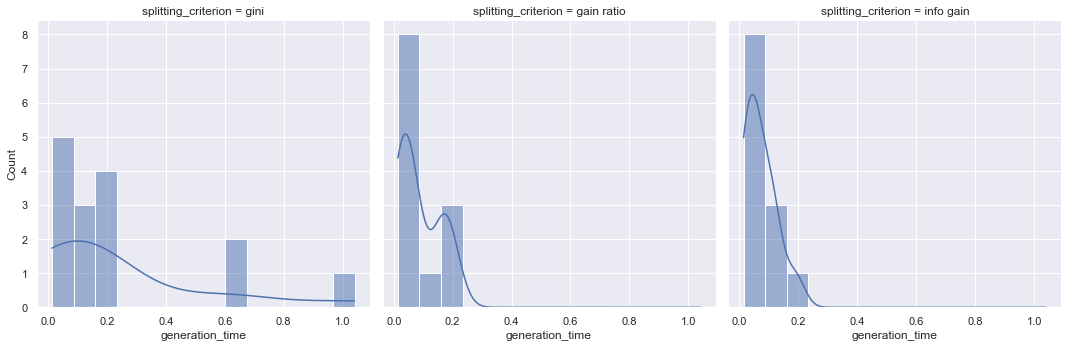

In [8]:
sns.displot(data=df, x="generation_time",col= "splitting_criterion", kde=True)

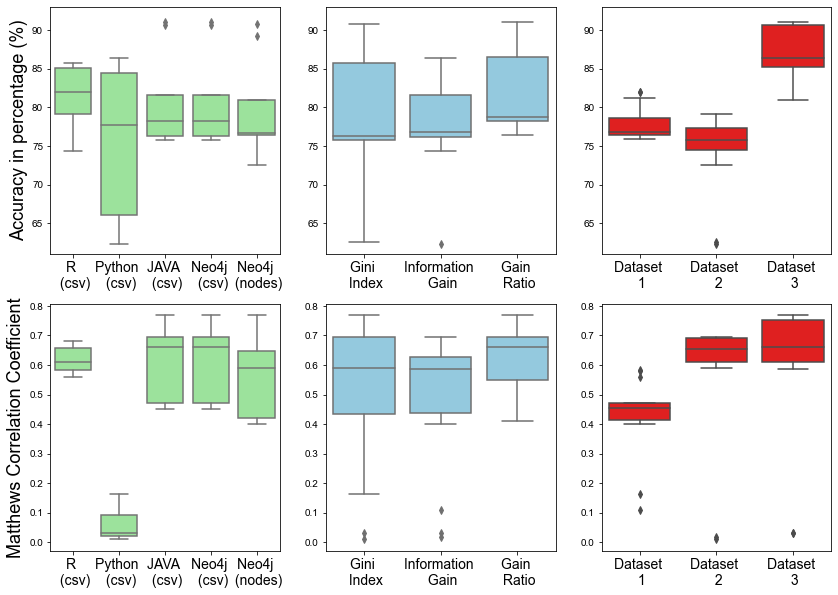

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10), sharey=False)

sns.set(font_scale = 1.2)

box1 = sns.boxplot(ax = axes[0,0], data=df, x="language", y="accuracy", color = "lightgreen")
box2 = sns.boxplot(ax = axes[0,1], data=df, x="splitting_criterion", y="accuracy", color = "skyblue")
box3 = sns.boxplot(ax = axes[0,2], data=df, x="dataset", y="accuracy", color = "red")
box4 = sns.boxplot(ax = axes[1,0], data=df, x="language", y="mcc", color = "lightgreen")
box5 = sns.boxplot(ax = axes[1,1], data=df, x="splitting_criterion", y="mcc", color = "skyblue")
box6 = sns.boxplot(ax = axes[1,2], data=df, x="dataset", y="mcc", color = "red")

box1.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'Neo4j \n (csv)', 'Neo4j \n (nodes)'])
box2.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box3.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])
box4.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'Neo4j \n (csv)', 'Neo4j \n (nodes)'])
box5.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box6.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])

box1.set(xlabel=None)
box2.set(xlabel=None)
box3.set(xlabel=None)
box4.set(xlabel=None)
box5.set(xlabel=None)
box6.set(xlabel=None)

box1.set_ylabel('Accuracy in percentage (%)', fontsize = 18)
box2.set(ylabel=None)
box3.set(ylabel=None)
box4.set_ylabel('Matthews Correlation Coefficient', fontsize = 18)
box5.set(ylabel=None)
box6.set(ylabel=None)

box1.set_xticklabels(box1.get_xticklabels(), size = 14)
box2.set_xticklabels(box2.get_xticklabels(), size = 14)
box3.set_xticklabels(box3.get_xticklabels(), size = 14)
box4.set_xticklabels(box1.get_xticklabels(), size = 14)
box5.set_xticklabels(box2.get_xticklabels(), size = 14)
box6.set_xticklabels(box3.get_xticklabels(), size = 14)

box1.set(ylim=(61, 93))
box2.set(ylim=(61, 93))
box3.set(ylim=(61, 93))

fig.subplots_adjust(wspace=0.2, hspace=0.2)


plt.savefig('accuracy_percentage.pdf', 
          dpi=300, bbox_inches='tight')

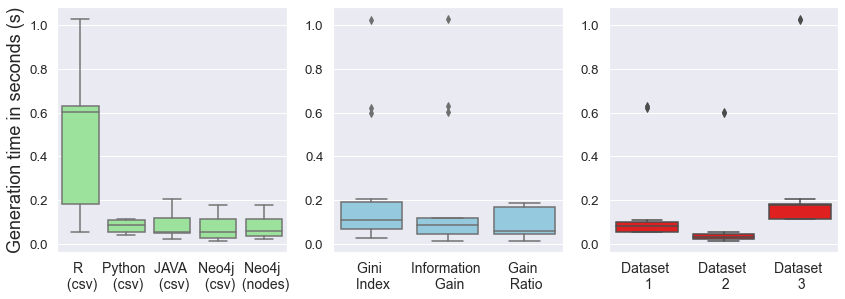

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4.5), sharey=False)

sns.set(font_scale = 1.5)

box4 = sns.boxplot(ax = axes[0], data=df, x="language", y="generation_time", color = "lightgreen")
box5 = sns.boxplot(ax = axes[1], data=df, x="splitting_criterion", y="generation_time", color = "skyblue")
box6 = sns.boxplot(ax = axes[2], data=df, x="dataset", y="generation_time", color = "red")

box4.set_xticklabels(['R \n (csv)','Python \n (csv)','JAVA \n (csv)', 'Neo4j \n (csv)', 'Neo4j \n (nodes)'])
box5.set_xticklabels(['Gini \n Index','Information \n Gain','Gain \n Ratio'])
box6.set_xticklabels(['Dataset \n 1','Dataset \n 2','Dataset \n 3'])

box4.set(xlabel=None)
box5.set(xlabel=None)
box6.set(xlabel=None)

box4.set_ylabel('Generation time in seconds (s)', fontsize = 18)
box5.set(ylabel=None)
box6.set(ylabel=None)


box4.set_xticklabels(box4.get_xticklabels(), size = 14)
box5.set_xticklabels(box5.get_xticklabels(), size = 14)
box6.set_xticklabels(box6.get_xticklabels(), size = 14)

fig.subplots_adjust(wspace=0.2, hspace=0)

plt.savefig('generation_time.pdf', 
          dpi=300, bbox_inches='tight')

NameError: name 'neo_df2' is not defined

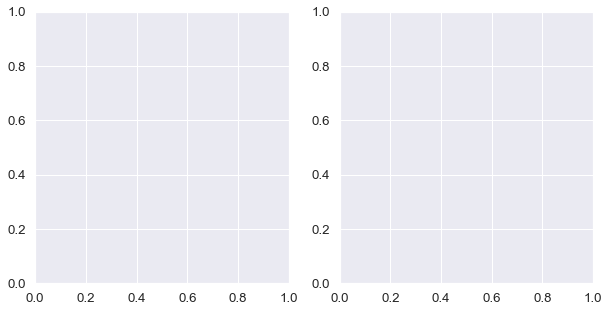

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

g = sns.swarmplot(data=neo_df2, x="language", y="accuracy", hue="dataset", ax = axes[0], s=15, dodge=True)

g.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
g.set(xlabel=None)
g.set(ylabel="Accuracy in percentage (%)")

g.legend().get_frame().set_linewidth(3.5)
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[0:], labels=labels[0:])

h= sns.swarmplot(data=neo_df2, x="language", y="generation_time", hue="dataset",dodge=True, ax=axes[1], s=15)
legend = h.legend()
legend.remove()
h.set_xticklabels(['Neo4j_CSV','Neo4j_DB'], size=16)
h.set(xlabel=None)
h.set(ylabel=None)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

In [ ]:
sns.catplot(data=neo_df2, kind="swarm", x="language", y="prediction_time", hue="dataset", s = 15)

In [ ]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [ ]:
#sns.pairplot(data=df, hue="language", height=2.5)

g = sns.pairplot(df,corner=True,plot_kws={"s": 10})
g.map_lower(corrfunc)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

a = df.plot(kind='scatter', x='accuracy', y='rows', s=100, ax = axes[0])
b = df.plot(kind='scatter', x='accuracy', y='generation_time', s=100, ax=axes[1])